RLE Image Compression Tecnique

In [24]:
import  cv2
import numpy as np
import matplotlib.pyplot as plt

def rle_encode(img) :
    flat = img.flatten()
    encoded = []
    count = 1
    
    for i in range (1, len(flat)):
        if flat[i] == flat[i-1] :
              count +=1
        else :
            encoded.append((flat[i-1], count)) 
            count = 1
    encoded.append((flat[-1], count))
    return encoded

img = cv2.imread('art.png' , 0)
encoded_image = rle_encode(img)

print(encoded_image[:20])  # Print first 20 encoded values for brevity
    


[(195, 3), (194, 1), (191, 1), (189, 1), (186, 1), (184, 1), (177, 1), (179, 1), (183, 1), (187, 1), (189, 1), (190, 1), (189, 2), (188, 1), (186, 1), (184, 1), (183, 1), (184, 1), (185, 1), (184, 1)]


decoded

In [25]:
def decoded (img, shape) :
    flat = []
    for i , c in img :
        flat.extend([i]*c)
    return np.array(flat).reshape(shape)
decoded_image = decoded(encoded_image , img.shape)

print(decoded_image)

[[195 195 195 ...  76  77  77]
 [184 184 185 ...  80  81  81]
 [177 178 179 ...  86  86  87]
 ...
 [ 95  95  95 ...  75  75  75]
 [ 91  92  92 ...  75  75  75]
 [ 87  88  90 ...  75  75  75]]


Text(0.5, 1.0, 'Decoded Image')

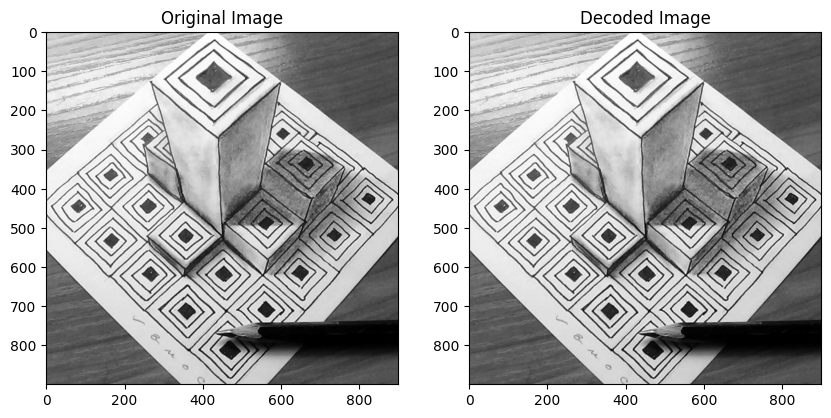

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")


plt.subplot(1,2,2)
plt.imshow(decoded_image, cmap='gray')
plt.title("Decoded Image")

ধাপ ৩: Color Depth Reduction

Code 1: Reduce Color Depth using Bit Shifting

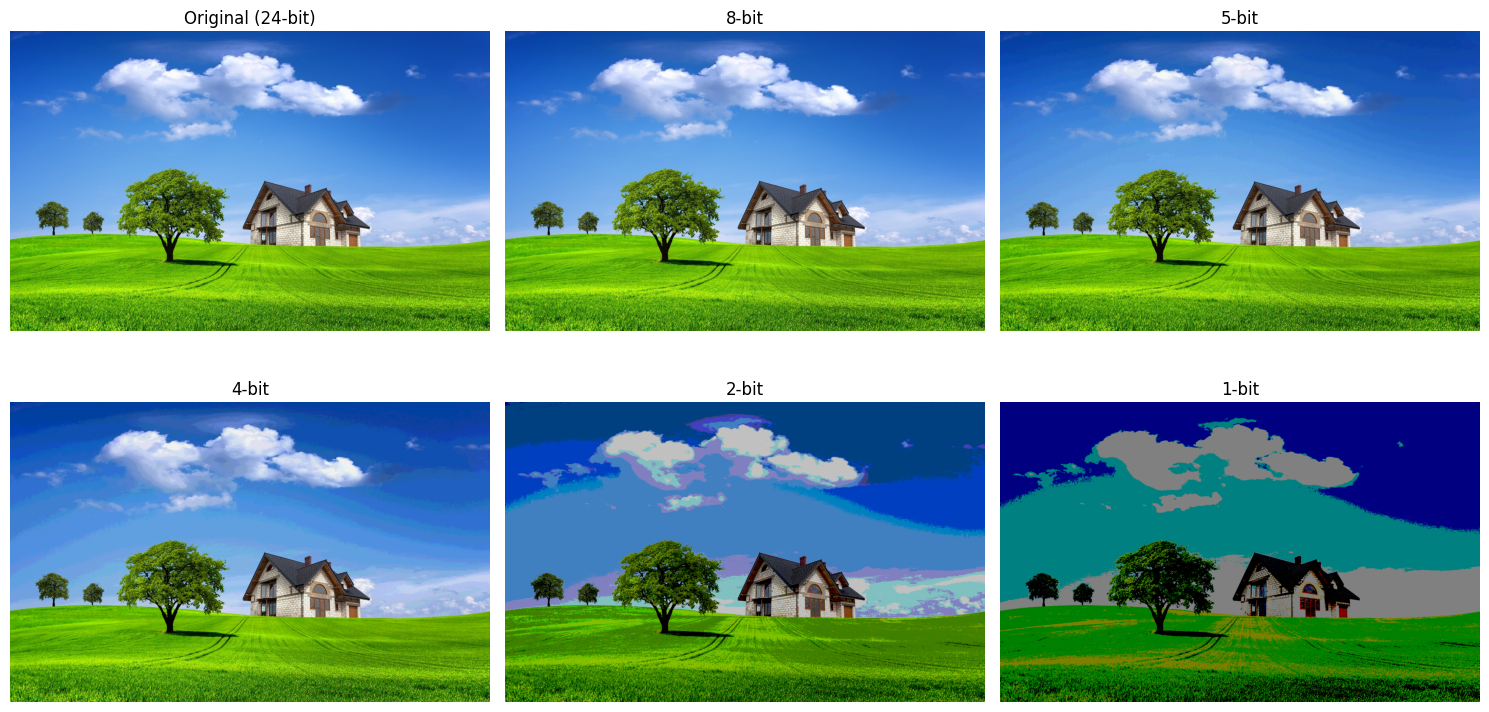

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduce_bit_depth(img, bits):
    # কত লেভেল থাকবে
    levels = 2 ** bits

    # scale factor
    factor = 256 // levels

    # reduction
    img_reduced = (img // factor) * factor
    return img_reduced

# Load 24-bit image
img = cv2.imread("nature3.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2 → RGB for matplotlib

# Reduce to different bit depths
img_8bit = reduce_bit_depth(img, 8)     # practically same
img_5bit = reduce_bit_depth(img, 5)
img_4bit = reduce_bit_depth(img, 4)
img_2bit = reduce_bit_depth(img, 2)
img_1bit = reduce_bit_depth(img, 1)

# Show using matplotlib
titles = ["Original (24-bit)", "8-bit", "5-bit", "4-bit", "2-bit", "1-bit"]
images = [img, img_8bit, img_5bit, img_4bit, img_2bit, img_1bit]

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


Pactice

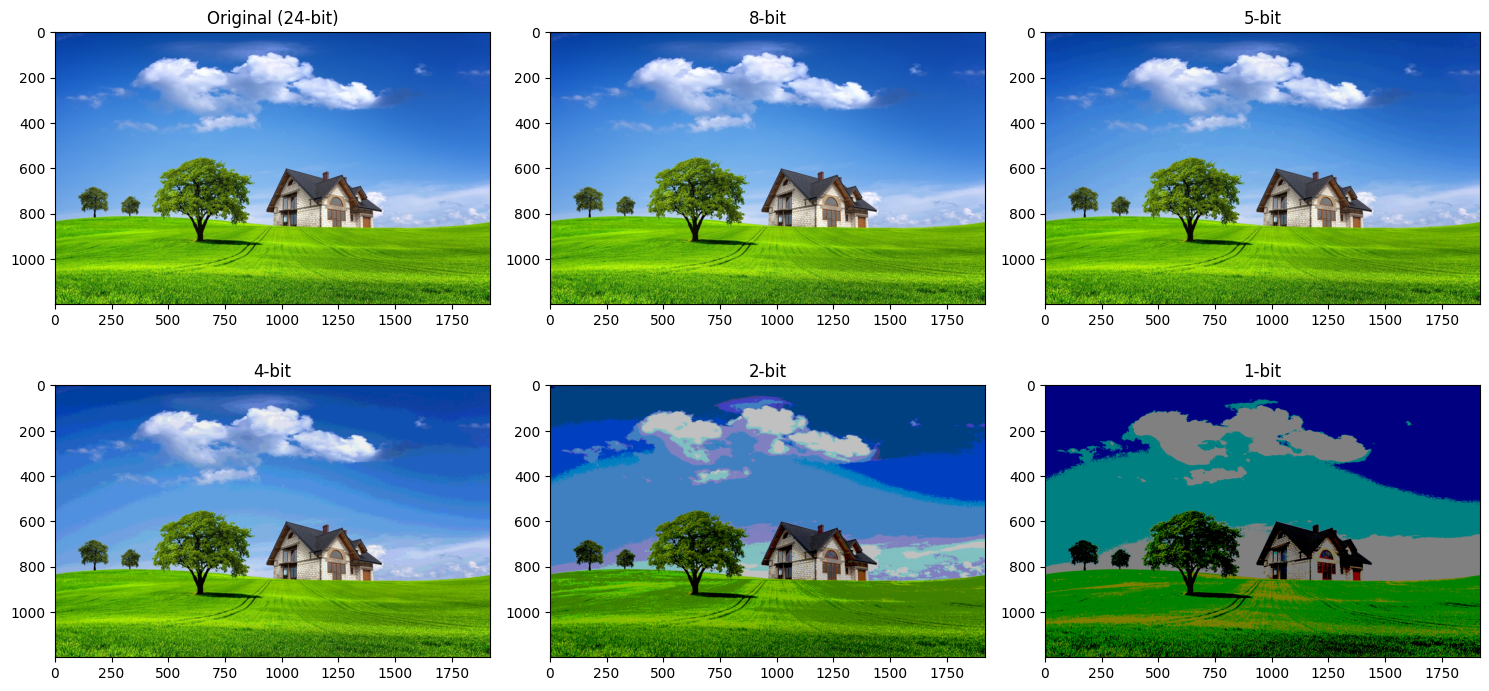

In [42]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


def reduce_bit_depth(img , bits) :
    level = 2 ** bits
    factor = 256 // level
    
    img_reduced = (img// factor)* factor
    
    return img_reduced
img = cv2.imread("nature3.png" )
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

img_8bit = reduce_bit_depth(img , 8)
img_5bit = reduce_bit_depth(img , 5)
img_4bit = reduce_bit_depth(img , 4)
img_2bit = reduce_bit_depth(img , 2)
img_1bit = reduce_bit_depth(img , 1)


titles = ["Original (24-bit)" , "8-bit" , "5-bit" , "4-bit" , "2-bit" , "1-bit"]
images = [img , img_8bit , img_5bit , img_4bit , img_2bit , img_1bit]

plt.figure(figsize=(15,8))
for i in range (6) :
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    
    
    plt.tight_layout()
plt.show()
  
